In [90]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [91]:
## Load the Data using numby or you can use pandas but take care --> (header=None)
data = np.genfromtxt('RegData.csv', delimiter=',')
data        ## the first column is the Features(X), and the second one is the Target(y)

array([[2.9000001 , 4.        ],
       [6.69999981, 7.4000001 ],
       [4.9000001 , 5.        ],
       [7.9000001 , 7.19999981],
       [9.80000019, 7.9000001 ],
       [6.9000001 , 6.0999999 ],
       [6.0999999 , 6.        ],
       [6.19999981, 5.80000019],
       [6.        , 5.19999981],
       [5.0999999 , 4.19999981],
       [4.69999981, 4.        ],
       [4.4000001 , 4.4000001 ],
       [5.80000019, 5.19999981]])

In [92]:
## Slice the Data to (X & y)
X = data[:, 0]   ## first column is the Features
y = data[:, 1]   ## second column is the target

X = X.reshape(-1, 1)   ## to be 2D array, don't change y 

print('X shape --', X.shape)  ## 2D array
print('y shape --', y.shape)  ## vector

X shape -- (13, 1)
y shape -- (13,)


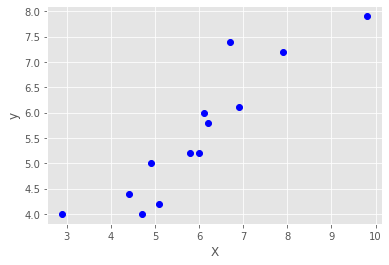

In [93]:
## plotting , check the relation between X, y
plt.plot(X, y, 'bo')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [94]:
## X is one feature (theta_1), what about theta_0
## we want to insert a column in X (containing only ones)
X = np.insert(arr=X, obj=0, values=1, axis=1)
X

array([[1.        , 2.9000001 ],
       [1.        , 6.69999981],
       [1.        , 4.9000001 ],
       [1.        , 7.9000001 ],
       [1.        , 9.80000019],
       [1.        , 6.9000001 ],
       [1.        , 6.0999999 ],
       [1.        , 6.19999981],
       [1.        , 6.        ],
       [1.        , 5.0999999 ],
       [1.        , 4.69999981],
       [1.        , 4.4000001 ],
       [1.        , 5.80000019]])

In [95]:
## Initialize random values for (theta_0 & theta_1) --> it will be updated with GD
thetas = np.zeros(2)    ## Let them be zeros 
thetas

array([0., 0.])

In [96]:
def batch_GD(X, y, theta_input, alfa, iters):
    '''' This Function tries to get the updated thetas using Batch GD
    Args:
    *****
        (X: 2D array) --> the Features of the Dataset containing ones (first column for theta_0)
        (y: 1D array) --> the Target of the Dataset
        (theta_input: 1D array) --> the initial values for thetas (random values), you will have thetas 
            according to your features, if you have one feature, then you have (theat_0, theta_1),
            If you have two features, then you have (theta_0, theta_1, theta_2) ans so on.
        (alfa: float) --> the learning rate
        (iters: int) --> the number of iterations required and after thetas will stop learning
    Returns:
    *******
        returns the updated thetas, you can use them for predicting
        If you have two features --> y_predicted = theta_0 * 1 + theta_1 * feature_1 ... and so on.
    '''

    
    for i in range(iters):  ## loop for (stopping criteria)
        
        h_theta = X @ theta_input   ## hypothesis (predicted)
        
        diff = h_theta - y           ## difference between predicted and Ground Truth
        
        cost = np.sum(diff**2) / (2 * len(X))  ## cost Function MSE
        
        gradient = (X.T @ diff) / len(X)       ## get the gradient
        
        theta_input = theta_input - alfa * gradient  ## update thetas, new_thetas = old_theta - alfa * gradient
        ## Note we update in the same place (theta_input)
        
    # return thetas final 
    return theta_input

In [97]:
## call the function
new_thetas = batch_GD(X, y, theta_input=thetas, alfa=0.01, iters=1000)

In [98]:
## Predicted values
y_pred = X @ new_thetas

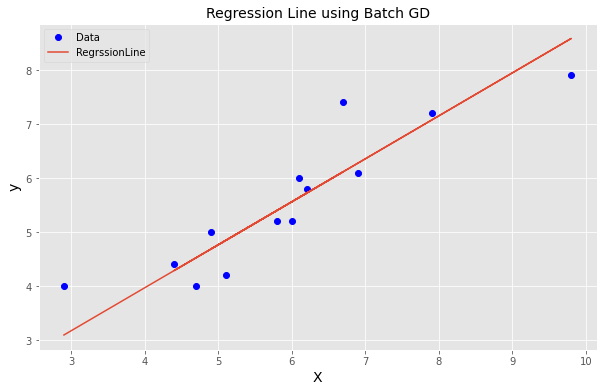

In [99]:
## remember, we add (column of ones in X), take the second one (Feature)
## Don't forget to slice (X, take the second column)
plt.figure(figsize=(10, 6))
plt.plot(X[:, 1], y, 'bo', label='Data')  
plt.plot(X[:, 1], y_pred, label='RegrssionLine')
plt.title('Regression Line using Batch GD', fontsize=14, color='k')
plt.xlabel('X', fontsize=14, color='k')
plt.ylabel('y', fontsize=14, color='k')
plt.legend()
plt.show()

In [100]:
## We can calculate (MSE & MAE) for the (y: True & y_pred: Predicted)

## MSE
def mean_squared_error(y_true, y_predicted):
    mse = np.sum((y_true - y_predicted)**2) / len(y_true)
    return mse
def mean_absolute_error(y_true, y_predicted):
    mae = np.sum(np.abs(y_true - y_predicted)) / len(y_true)
    return mae

## call the functions
print('MAE ', mean_absolute_error(y, y_pred))
print('MSE ', mean_squared_error(y, y_pred))   ## Later, we will use prepared libraries for that

MAE  0.4442679098028135
MSE  0.31458767460120385


#### Notes
* You can implement the Stochastic GD (SGD) & Mini-Batch GD by the same steps except the size of (m)
* You can get the thetas at each step of updating
* You can get the cost function at each step and draw a curve between thetas and cost function
* You can do the above two points in function by creating two empty lists and append in them
* You can change your stopping criteria, and stop at gradient <= , or cost <= , or what you want

### Done!